# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [94]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pandas.io.json import json_normalize
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
# Output RAW File (CSV)
output_data_raw = "output_data/cities_raw.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

Note: you may need to restart the kernel to use updated packages.


'C:\Users\Tomorrow' is not recognized as an internal or external command,
operable program or batch file.


In [31]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url + "New York")
result = response.json()
result

NameError: name 'api_key' is not defined

In [26]:
data = []
i = 0
for city in cities:
    result = requests.get(query_url + city).json()
    i = i + 1
    try:
        tempmax=result["main"]['temp_max']
        humidity=result["main"]["humidity"]
        speed=result['wind']["speed"]
        cloudiness=result["clouds"]["all"]
        lat=result["coord"]["lat"]
        country=result['sys']["country"]
        date=result['dt']
        lon=result["coord"]["lon"]
        data.append([city,cloudiness,country,date,humidity,lat,lon,tempmax,speed])
        print(f"counter {i} || {city}")
        time.sleep(.1)
    except:
        print("city not found")
    

counter 1 || progreso
counter 2 || roald
counter 3 || jamestown
counter 4 || puerto ayora
counter 5 || new norfolk
counter 6 || ribeira grande
counter 7 || mandalgovi
counter 8 || tuktoyaktuk
counter 9 || niksic
counter 10 || westport
counter 11 || maragogi
counter 12 || ushuaia
counter 13 || trincomalee
counter 14 || nikolskoye
counter 15 || geraldton
counter 16 || tilichiki
counter 17 || reconquista
counter 18 || sao joao da barra
counter 19 || uray
counter 20 || bikaner
counter 21 || rikitea
counter 22 || avarua
counter 23 || saint-philippe
counter 24 || carnarvon
counter 25 || villagarzon
city not found
counter 27 || kapaa
counter 28 || vaini
counter 29 || barrow
counter 30 || vurnary
counter 31 || mahibadhoo
counter 32 || busselton
counter 33 || deputatskiy
counter 34 || houma
counter 35 || lagoa
counter 36 || mataura
counter 37 || sao joaquim
counter 38 || cherskiy
counter 39 || parabel
counter 40 || camacha
counter 41 || pali
counter 42 || buckeye
counter 43 || iranshahr
counter

counter 358 || bengkulu
city not found
counter 360 || tura
counter 361 || marshfield
counter 362 || marzuq
counter 363 || hvolsvollur
counter 364 || batticaloa
counter 365 || norman wells
counter 366 || codrington
city not found
counter 368 || panzhihua
city not found
city not found
counter 371 || fort-shevchenko
counter 372 || goderich
counter 373 || aldan
counter 374 || saint-leu
city not found
counter 376 || ahipara
counter 377 || vao
counter 378 || yenagoa
counter 379 || panalingaan
counter 380 || gigmoto
counter 381 || petropavlovka
counter 382 || maarianhamina
counter 383 || nishihara
counter 384 || wajid
counter 385 || kirakira
counter 386 || caravelas
counter 387 || pueblo nuevo
counter 388 || bowen
counter 389 || mus
counter 390 || sinnamary
counter 391 || saint anthony
counter 392 || harper
counter 393 || gushikawa
city not found
counter 395 || alofi
counter 396 || swellendam
counter 397 || san andres
city not found
counter 399 || cedar city
counter 400 || belyy yar
counter 4

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
data_df=pd.DataFrame(data,columns=["City","Cloudiness","Country", "Date","Humidity","Lat","Lng","Max Temp","Wind Speed"])
data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,progreso,75,MX,1595296133,94,21.28,-89.67,82.00,9.80
1,roald,100,NO,1595296189,87,62.58,6.13,51.80,11.41
2,jamestown,1,US,1595296033,60,42.10,-79.24,71.60,8.05
3,puerto ayora,99,EC,1595295716,87,-0.74,-90.35,69.01,8.01
4,new norfolk,92,AU,1595296014,75,-42.78,147.06,55.00,5.99


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [34]:
#  Get the indices of cities that have humidity over 100%.
Humidity_data = data_df[data_df["Humidity"]>100].index
Humidity_data

Int64Index([], dtype='int64')

In [35]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_data = data_df.drop(Humidity_data, inplace = False)
clean_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,progreso,75,MX,1595296133,94,21.28,-89.67,82.00,9.80
1,roald,100,NO,1595296189,87,62.58,6.13,51.80,11.41
2,jamestown,1,US,1595296033,60,42.10,-79.24,71.60,8.05
3,puerto ayora,99,EC,1595295716,87,-0.74,-90.35,69.01,8.01
4,new norfolk,92,AU,1595296014,75,-42.78,147.06,55.00,5.99


In [36]:
# Extract relevant fields from the data frame
latitude = clean_data["Lat"]
max_temp = clean_data["Max Temp"]
humidity = clean_data["Humidity"]
cloudiness = clean_data["Cloudiness"]
wind_speed = clean_data["Wind Speed"]  

# Export the City_Data into a csv
clean_data.to_csv(output_data_file,index_label="city_id")


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

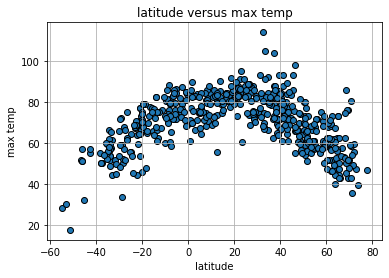

In [37]:
plt.scatter(latitude,max_temp,edgecolor="black")
plt.title("latitude versus max temp")
plt.ylabel("max temp")
plt.xlabel("latitude")
plt.grid(True)
plt.savefig("figure1.png")
plt.show()

## Latitude vs. Humidity Plot

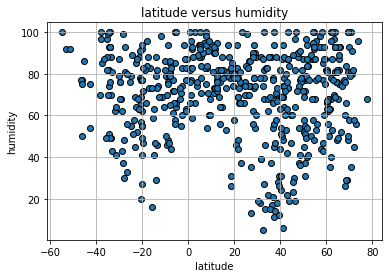

In [41]:
plt.scatter(latitude,humidity,edgecolor="black")
plt.title("latitude versus humidity")
plt.ylabel("humidity")
plt.xlabel("latitude")
plt.grid(True)
plt.savefig("figure2.png")
plt.show()

## Latitude vs. Cloudiness Plot

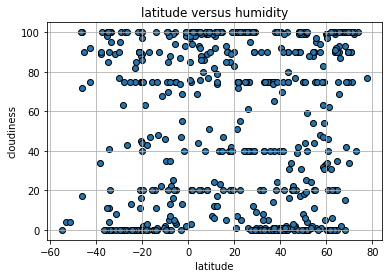

In [42]:
plt.scatter(latitude,cloudiness,edgecolor="black")
plt.title("latitude versus humidity")
plt.ylabel("cloudiness")
plt.xlabel("latitude")
plt.grid(True)
plt.savefig("figure3.png")
plt.show()

## Latitude vs. Wind Speed Plot

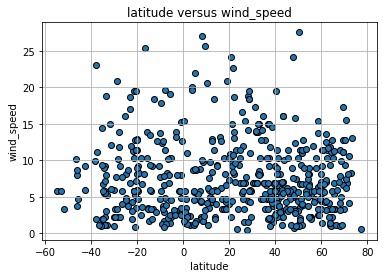

In [64]:
plt.scatter(latitude,wind_speed,edgecolor="black")
plt.title("latitude versus wind_speed")
plt.ylabel("wind_speed")
plt.xlabel("latitude")
plt.grid(True)
plt.savefig("figure4.png")
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [72]:
# Create Northern and Southern Hemisphere DataFrames
greater_than_df = clean_data.loc[(clean_data["Lat"] >= 0)]
greater_than_df

less_than_df = clean_data.loc[(clean_data["Lng"] < 0)]
less_than_df


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,progreso,75,MX,1595296133,94,21.28,-89.67,82.00,9.80
2,jamestown,1,US,1595296033,60,42.10,-79.24,71.60,8.05
3,puerto ayora,99,EC,1595295716,87,-0.74,-90.35,69.01,8.01
5,ribeira grande,24,PT,1595296041,69,38.52,-28.70,69.17,2.04
7,tuktoyaktuk,90,CA,1595296042,81,69.45,-133.04,42.80,12.75
...,...,...,...,...,...,...,...,...,...
536,belmonte,20,BR,1595296164,73,-15.86,-38.88,75.20,10.29
539,alta floresta,0,BR,1595296314,50,-9.88,-56.09,72.21,4.63
544,axim,100,GH,1595296079,92,4.87,-2.24,75.09,5.75
545,stromness,54,GB,1595296315,93,58.97,-3.30,50.00,5.82


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

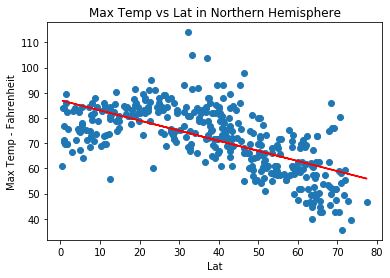

In [75]:
x_axis = greater_than_df["Lat"]
y_axis = greater_than_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel("Lat")
plt.ylabel("Max Temp - Fahrenheit")
plt.title("Max Temp vs Lat in Northern Hemisphere")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

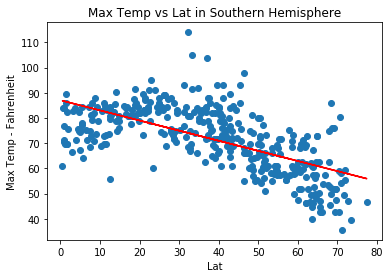

In [78]:
x_axis = greater_than_df["Lat"]
y_axis = greater_than_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel("Lat")
plt.ylabel("Max Temp - Fahrenheit")
plt.title("Max Temp vs Lat in Southern Hemisphere")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

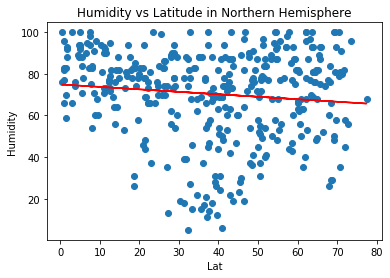

In [91]:
x_axis = greater_than_df["Lat"]
y_axis = greater_than_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.title("Humidity vs Latitude in Northern Hemisphere")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [93]:
x_axis = southern_hemisphere["Lat"]
y_axis = southern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.title("Humidity vs Latitude in Southern Hemisphere")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")

NameError: name 'southern_hemisphere' is not defined

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [90]:
x_axis = northern_hemisphere["Latitude"]
y_axis = northern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs Latitude in Northern Hemisphere")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")

NameError: name 'northern_hemisphere' is not defined

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:

x_axis = southern_hemisphere["Latitude"]
y_axis = southern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs Latitude in Southern Hemisphere")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:

x_axis = northern_hemisphere["Latitude"]
y_axis = northern_hemisphere["Windspeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel("Latitude")
plt.ylabel("Windspeed")
plt.title("Windspeed vs Latitude in Northern Hemisphere")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_axis = southern_hemisphere["Latitude"]
y_axis = southern_hemisphere["Windspeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel("Latitude")
plt.ylabel("Windspeed")
plt.title("Windspeed vs Latitude in Southern Hemisphere")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")